Nama: Muhammad Ashlah Afifi

NIM: 1103210126

IMPORT

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

Mount Google Drive

In [16]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Connect GColab to GDrive

In [17]:
# Load the data
data_path = '/content/drive/MyDrive/Dataset/melb_data.csv'
melb_data = pd.read_csv(data_path)

In [23]:
melb_data

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15388,19732,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
15389,19733,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
15390,19734,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
15392,19736,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 15395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6196 non-null   int64  
 1   Suburb         6196 non-null   object 
 2   Address        6196 non-null   object 
 3   Rooms          6196 non-null   int64  
 4   Type           6196 non-null   object 
 5   Price          6196 non-null   float64
 6   Method         6196 non-null   object 
 7   SellerG        6196 non-null   object 
 8   Date           6196 non-null   object 
 9   Distance       6196 non-null   float64
 10  Postcode       6196 non-null   float64
 11  Bedroom2       6196 non-null   float64
 12  Bathroom       6196 non-null   float64
 13  Car            6196 non-null   float64
 14  Landsize       6196 non-null   float64
 15  BuildingArea   6196 non-null   float64
 16  YearBuilt      6196 non-null   float64
 17  CouncilArea    6196 non-null   object 
 18  Lattitude   

In [26]:
# Drop missing values
melb_data.dropna(inplace=True)

In [27]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 15395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6196 non-null   int64  
 1   Suburb         6196 non-null   object 
 2   Address        6196 non-null   object 
 3   Rooms          6196 non-null   int64  
 4   Type           6196 non-null   object 
 5   Price          6196 non-null   float64
 6   Method         6196 non-null   object 
 7   SellerG        6196 non-null   object 
 8   Date           6196 non-null   object 
 9   Distance       6196 non-null   float64
 10  Postcode       6196 non-null   float64
 11  Bedroom2       6196 non-null   float64
 12  Bathroom       6196 non-null   float64
 13  Car            6196 non-null   float64
 14  Landsize       6196 non-null   float64
 15  BuildingArea   6196 non-null   float64
 16  YearBuilt      6196 non-null   float64
 17  CouncilArea    6196 non-null   object 
 18  Lattitude   

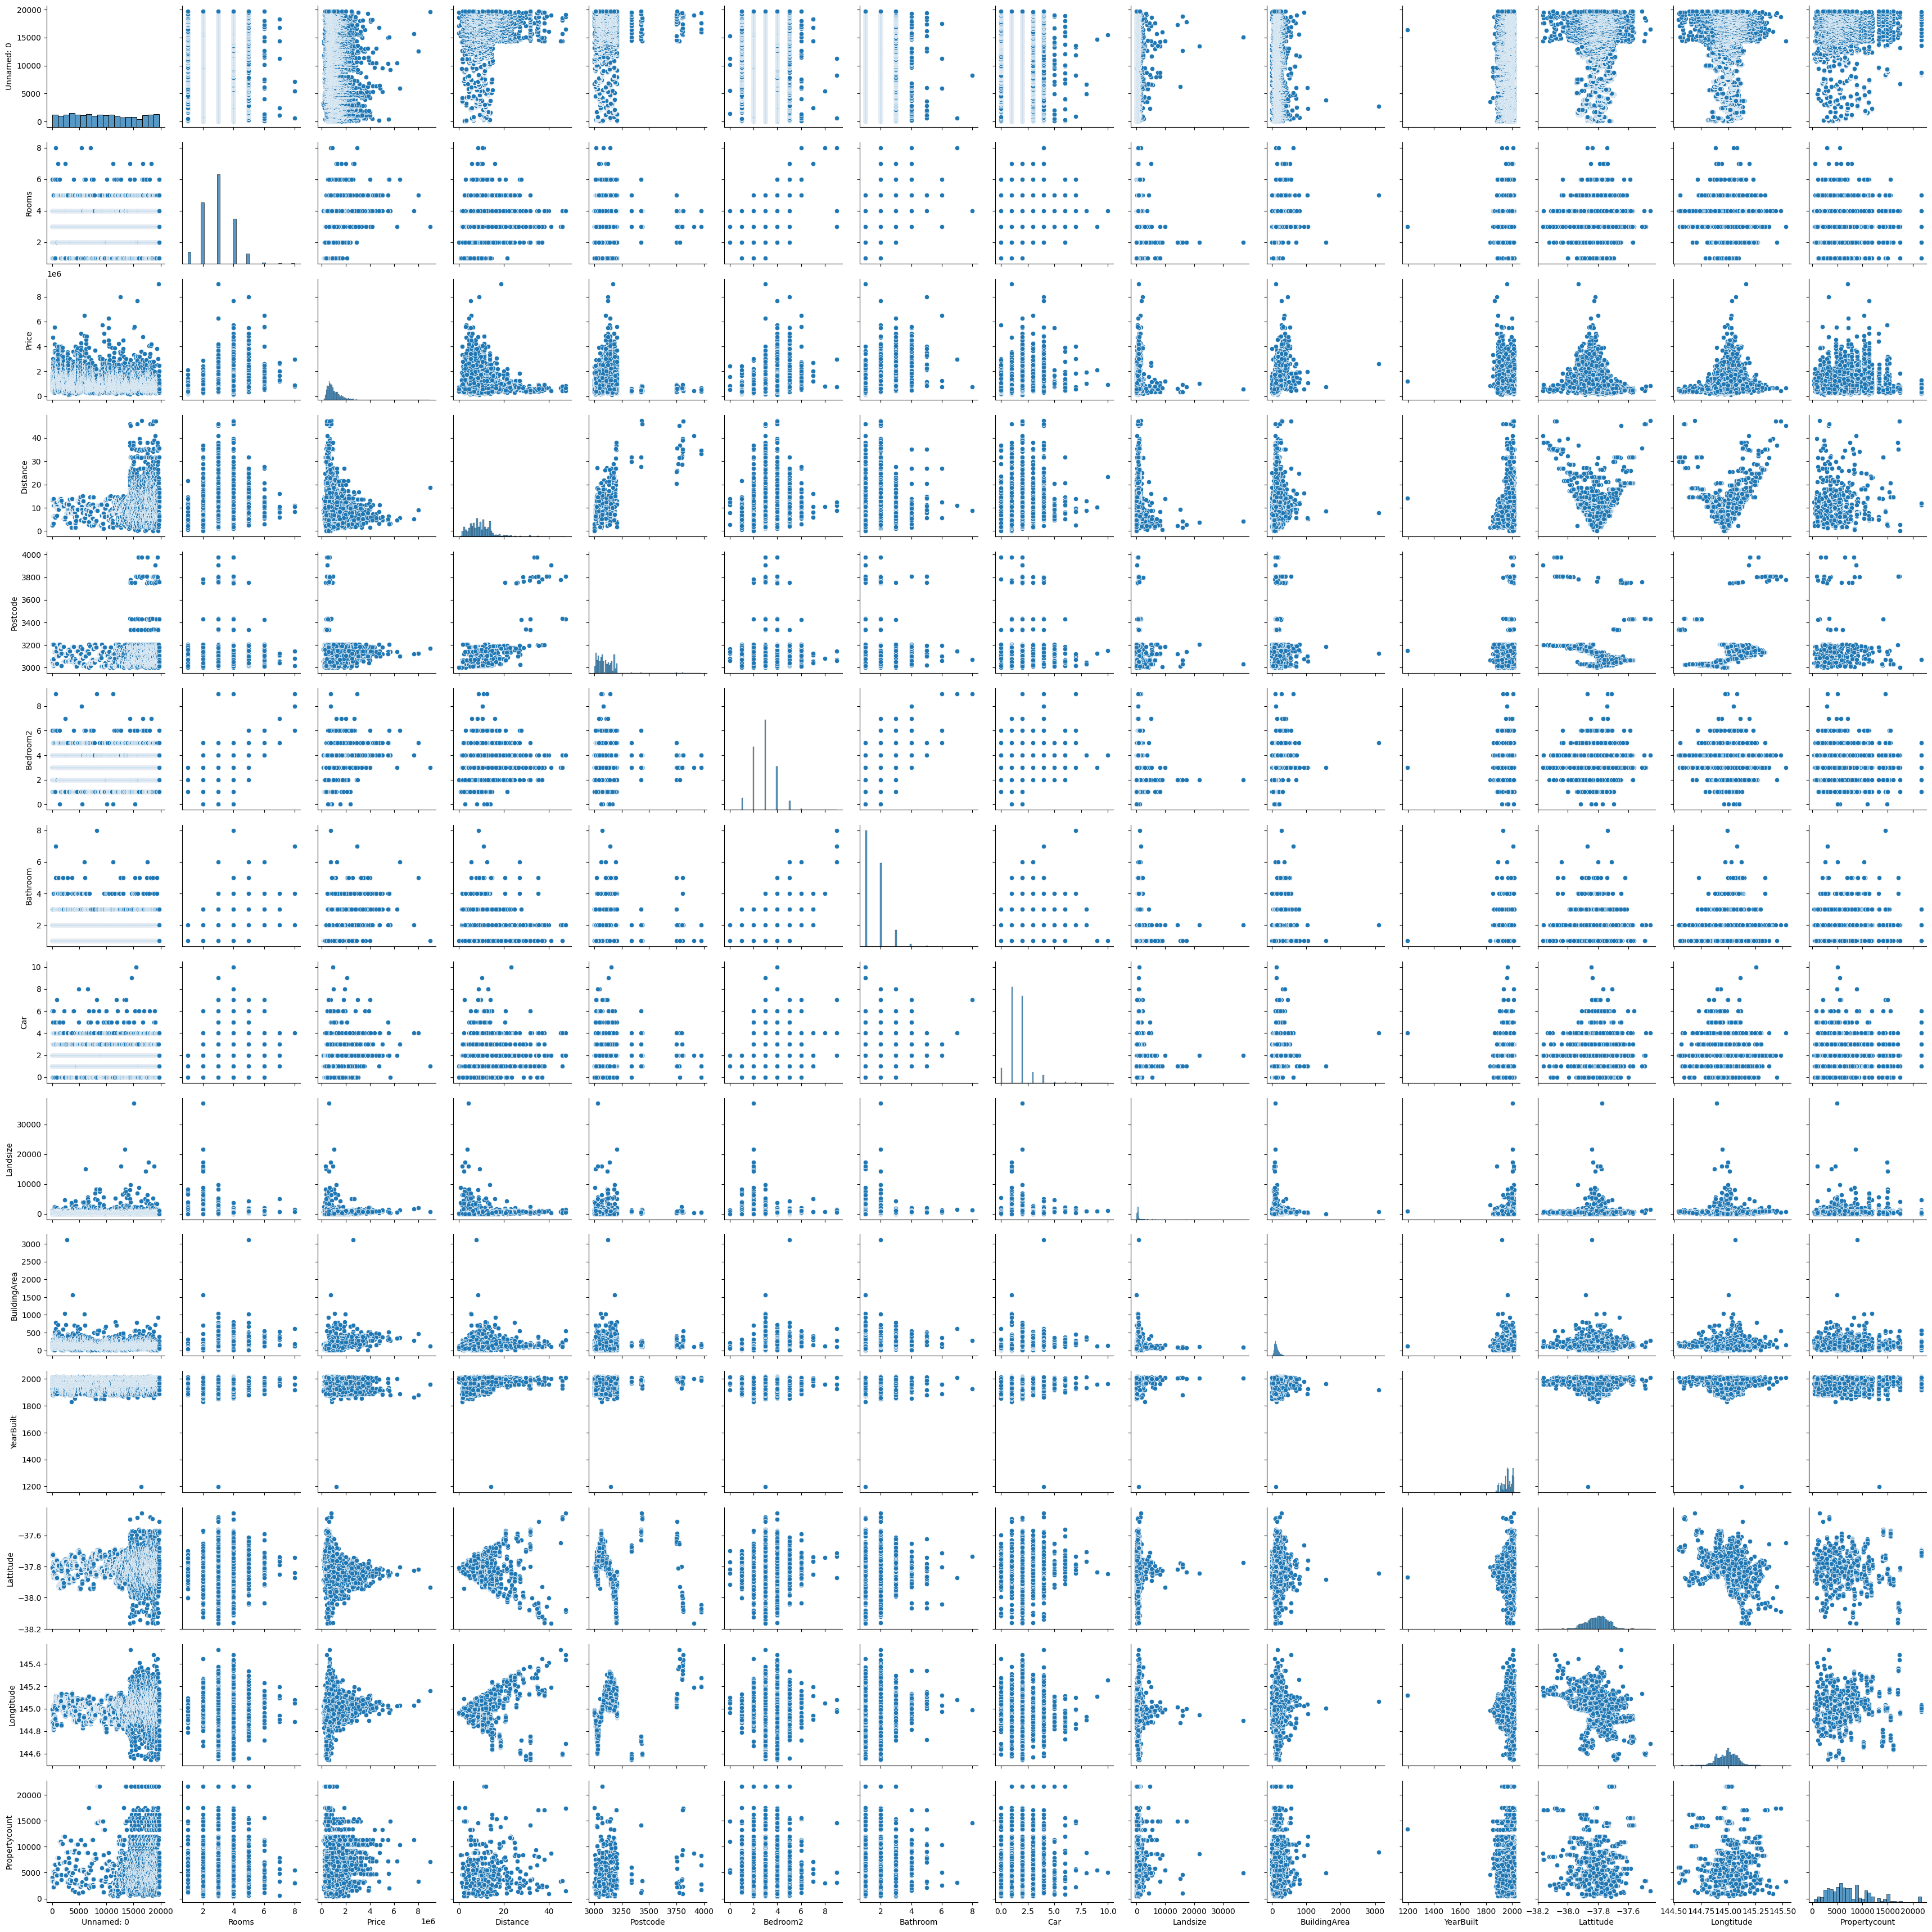

In [31]:
# Visualize the data (example)
# For illustration purposes, let's visualize the relationship between two columns
sns.pairplot(melb_data)
plt.show()

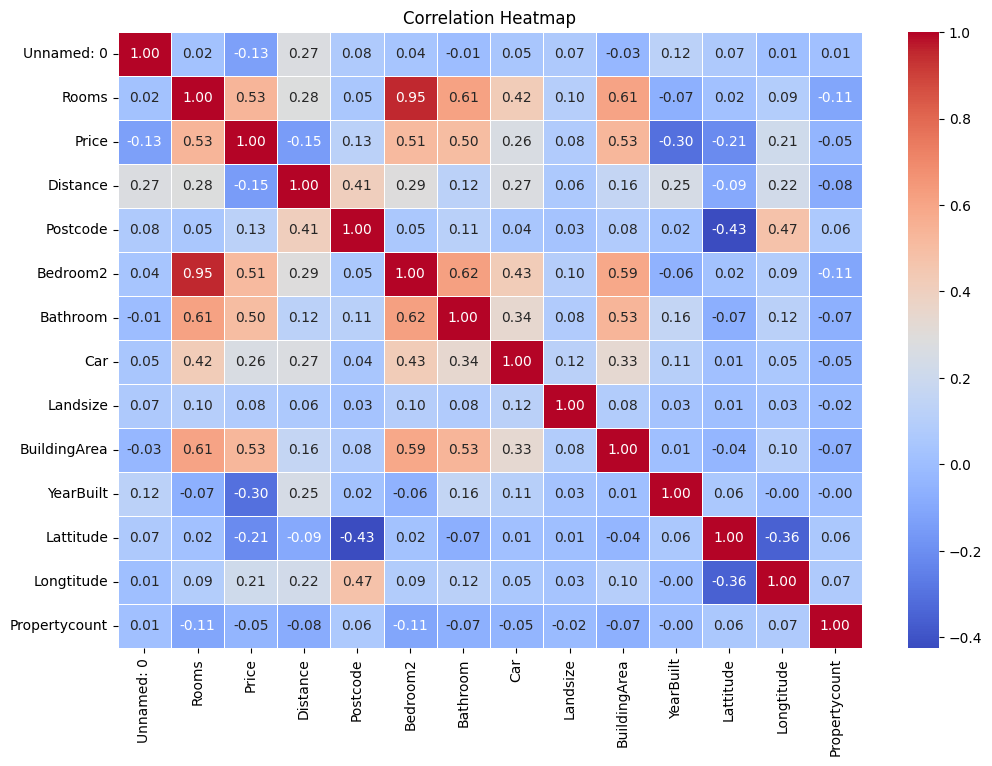

In [33]:
# Generate correlation matrix for numeric columns only
numeric_columns = melb_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Feature Engineering (example)
# For illustration purposes, let's say we want to drop some columns and handle missing values
selected_columns = ['Rooms', 'Bathroom', 'Bedroom2', 'BuildingArea']
data = melb_data[selected_columns].dropna()

In [50]:
# Split the data 70% for training
X = melb_data[selected_columns]
y = melb_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert the imputed arrays back to DataFrames
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Now, X_train_imputed and X_test_imputed contain the dataset with imputed missing values

# Train using XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Train using Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Train using Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Evaluate using MAE
# For XGBoost
xgb_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

# For Random Forest
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)

# For Decision Tree
dt_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_pred)

print("XGBoost MAE:", xgb_mae)
print("Random Forest MAE:", rf_mae)
print("Decision Tree MAE:", dt_mae)

XGBoost MAE: 356807.4169076116
Random Forest MAE: 365588.702698271
Decision Tree MAE: 398433.3656601181
